# Breast cancer PSI-MS - Profiling

Import packages

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA # Package for PCA calculation
from sklearn.preprocessing import StandardScaler # Package for standardize data
import matplotlib.transforms as transforms
import seaborn as sns
from scipy import stats
import statsmodels.stats as sm
%matplotlib inline

File directory / Filename

In [14]:
Path = r'D:\Breast Cancer PSIMS\Codes and figures'
Filename_train = 'PSIMS_Data_from_Lab.csv'

Preprocess data

In [15]:
# Read raw file for model construction
Raw_data = pd.read_csv(os.path.join(Path,Filename_train))

# Convert to malignant (1) and benign (0), ignoring subtyping
Raw_data['subtype'] = Raw_data['subtype'].apply(lambda x: np.clip(x,0,1))

x = Raw_data.iloc[:,2:]
Label = Raw_data.iloc[:,1]

Plot PCA

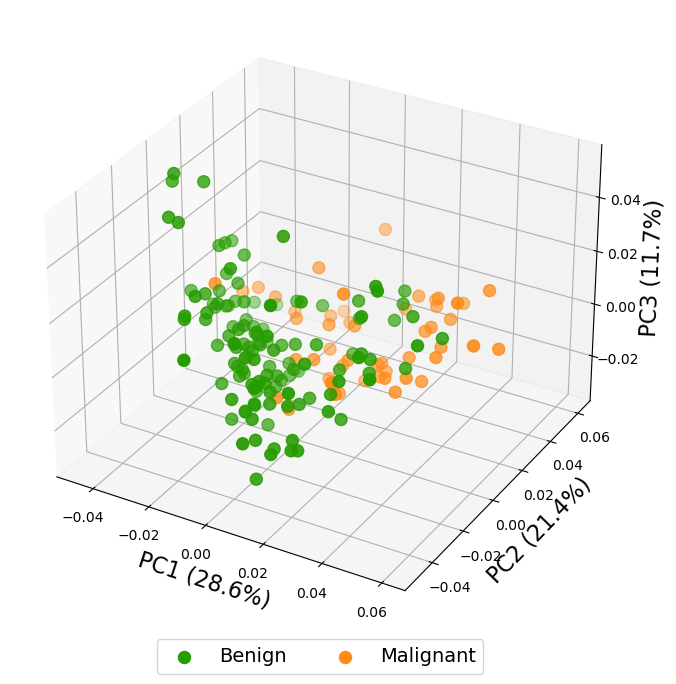

In [5]:
# Calculate PCA
pca = PCA(n_components = 3) # Calculate first three PCs
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents,columns = ['PC1','PC2','PC3'])
principalDF.loc[:,'Group'] = Label # Add additional column (label)
EV = pca.explained_variance_ratio_ # Calculate variance explained

fig = plt.figure(figsize=(8,10)) # Create figure
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('PC1 (%.1f'%(EV[0]*100)+'%)', fontsize = 16) # x label
ax.set_ylabel('PC2 (%.1f'%(EV[1]*100)+'%)', fontsize = 16) # y label
ax.set_zlabel('PC3 (%.1f'%(EV[2]*100)+'%)', fontsize = 16) # y label

indicesToKeep = principalDF['Group'] == 0
ax.scatter(principalDF.loc[indicesToKeep, 'PC1'],
           principalDF.loc[indicesToKeep, 'PC2'],
           principalDF.loc[indicesToKeep,'PC3'],
           c = '#269c00', label='Benign',s = 75)

indicesToKeep = principalDF['Group'] == 1
ax.scatter(principalDF.loc[indicesToKeep, 'PC1'],
           principalDF.loc[indicesToKeep, 'PC2'],
           principalDF.loc[indicesToKeep,'PC3'],
           c = '#ff8a17', label='Malignant',s = 75)

handles, labels= fig.gca().get_legend_handles_labels()
ax.legend(handles, ['Benign','Malignant'], loc='upper center', bbox_to_anchor=(0.5, 0),fontsize = 14, ncol=2)
ax.grid()

fig.savefig(os.path.join(Path,'PCA.tif'), dpi=300)

Box plot

In [6]:
# m/z 703.6
df_boxplot = pd.DataFrame({"Group":Label, "Area":x.iloc[:,202].values})

fig = plt.figure(figsize=(6,7.5)) # Create figure

ax = sns.boxplot(x="Group", y = "Area", data = df_boxplot, palette=['#269c00','#ff8a17'],linewidth=3)
sns.despine(top = True, right = True)
plt.tick_params(labelsize=20)
ax.set_xticklabels(["Benign", "Malignant"], fontsize = 28)
ax.set_xlabel('') # y label
ax.set_ylabel('Normalized signal', fontsize=32)

x1, x2 = 0, 1   # First and second column
y, h = df_boxplot['Area'].max()*1.05, df_boxplot['Area'].max()*0.05
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=4, c='k')
#plt.text((x1+x2)*.5, y+h, '****', ha='center', va='bottom', color='k', fontsize = 28)
fig.tight_layout()

fig.savefig(os.path.join(Path,'Box plot mz703.tif'), dpi=120)
plt.close()

In [7]:
# m/z 754.5
df_boxplot = pd.DataFrame({"Group":Label, "Area":x.iloc[:,253].values})

fig = plt.figure(figsize=(6,7.5)) # Create figure

ax = sns.boxplot(x="Group", y = "Area", data = df_boxplot, palette=['#269c00','#ff8a17'],linewidth=3)
sns.despine(top = True, right = True)
plt.tick_params(labelsize=20)
ax.set_xticklabels(["Benign", "Malignant"], fontsize = 28)
ax.set_xlabel('') # y label
ax.set_ylabel('Normalized signal', fontsize=32)

x1, x2 = 0, 1   # First and second column
y, h = df_boxplot['Area'].max()*1.05, df_boxplot['Area'].max()*0.05
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=4, c='k')
#plt.text((x1+x2)*.5, y+h, '****', ha='center', va='bottom', color='k', fontsize = 28)
fig.tight_layout()

fig.savefig(os.path.join(Path,'Box plot mz754.tif'), dpi=120)
plt.close()

In [8]:
# m/z 798.5
df_boxplot = pd.DataFrame({"Group":Label, "Area":x.iloc[:,297].values})

fig = plt.figure(figsize=(6,7.5)) # Create figure

ax = sns.boxplot(x="Group", y = "Area", data = df_boxplot, palette=['#269c00','#ff8a17'],linewidth=3)
sns.despine(top = True, right = True)
plt.tick_params(labelsize=20)
ax.set_xticklabels(["Benign", "Malignant"], fontsize = 28)
ax.set_xlabel('') # y label
ax.set_ylabel('Normalized signal', fontsize=32)

x1, x2 = 0, 1   # First and second column
y, h = df_boxplot['Area'].max()*1.05, df_boxplot['Area'].max()*0.05
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=4, c='k')
#plt.text((x1+x2)*.5, y+h, '****', ha='center', va='bottom', color='k', fontsize = 28)
fig.tight_layout()

fig.savefig(os.path.join(Path,'Box plot mz798.tif'), dpi=120)
plt.close()

In [9]:
# m/z 826.6
df_boxplot = pd.DataFrame({"Group":Label, "Area":x.iloc[:,325].values})

fig = plt.figure(figsize=(6,7.5)) # Create figure

ax = sns.boxplot(x="Group", y = "Area", data = df_boxplot, palette=['#269c00','#ff8a17'],linewidth=3)
sns.despine(top = True, right = True)
plt.tick_params(labelsize=20)
ax.set_xticklabels(["Benign", "Malignant"], fontsize = 28)
ax.set_xlabel('') # y label
ax.set_ylabel('Normalized signal', fontsize=32)

x1, x2 = 0, 1   # First and second column
y, h = df_boxplot['Area'].max()*1.05, df_boxplot['Area'].max()*0.05
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=4, c='k')
#plt.text((x1+x2)*.5, y+h, '****', ha='center', va='bottom', color='k', fontsize = 28)
fig.tight_layout()

fig.savefig(os.path.join(Path,'Box plot mz826.tif'), dpi=120)
plt.close()

ROC curve

In [16]:
# Read raw file for model construction
Filename = 'ROC Results.xlsx'
df_ROC = pd.read_excel(os.path.join(Path,Filename), header=None)

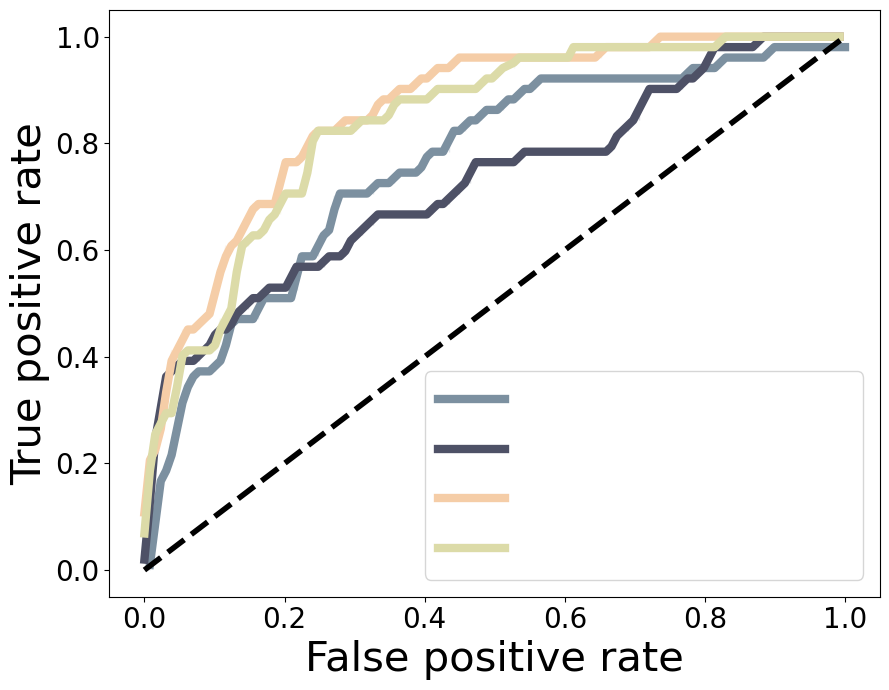

In [18]:
c = ["#7C90A0","#4E5166","#F5CDA7","#DCDBA8"]

fig = plt.figure(figsize=(9,7)) # Create figure
ax = fig.add_subplot()

ax = sns.lineplot(x = 1-df_ROC.iloc[:,1]/100, y = df_ROC.iloc[:,0]/100, linewidth=6, label='mz703', color=c[0])
ax = sns.lineplot(x = 1-df_ROC.iloc[:,3]/100, y = df_ROC.iloc[:,2]/100, linewidth=6, label='mz754', color=c[1])
ax = sns.lineplot(x = 1-df_ROC.iloc[:,5]/100, y = df_ROC.iloc[:,4]/100, linewidth=6, label='mz798', color=c[2])
ax = sns.lineplot(x = 1-df_ROC.iloc[:,7]/100, y = df_ROC.iloc[:,6]/100, linewidth=6, label='mz826', color=c[3])

ax = sns.lineplot(x = [0,1], y = [0,1], linewidth=4, color='k')
ax.lines[4].set_linestyle("--")
ax.set_xlabel('False positive rate', fontsize=30) # y label
ax.set_ylabel('True positive rate', fontsize=30) # y label
plt.tick_params(labelsize=20)

handles, labels= fig.gca().get_legend_handles_labels()
ax.legend(handles, [' '*30,' '*30,' '*30,' '*30], loc='lower right',fontsize = 24)
fig.tight_layout()
plt.show()

fig.savefig(os.path.join(Path,'ROC curve.tif'), dpi=120)
plt.close()